In [23]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap

# Predictions Analysis

In [29]:
# Load the dataset
df = pd.read_feather("model_predictions.feather")
df.head()

,model_name,true_weight,predicted_weight,set_type,additional_params,patient_id,pixel_array_file
0,vit_b_16_scaling_factor_pixel_spacing_slice_th...,61.0,75.226959,Train,None,ANONYM-SMUXNZ_159,Scan_3774.npy
1,vit_b_16_scaling_factor_pixel_spacing_slice_th...,60.0,69.510887,Train,None,ANONYM-GS4VD_115,Scan_4161.npy
2,vit_b_16_scaling_factor_pixel_spacing_slice_th...,52.0,72.877876,Train,None,ANONYM-LWQW5V_143,Scan_343.npy
3,vit_b_16_scaling_factor_pixel_spacing_slice_th...,89.0,81.838478,Train,None,ANONYM-XT8UJZ_117,Scan_1163.npy
4,vit_b_16_scaling_factor_pixel_spacing_slice_th...,85.0,84.898613,Train,None,ANONYM-SMUXNZ_310,Scan_3925.npy


In [28]:
# filter out training data
df = df[df['set_type'] == 'Validation']
df.head()

,model_name,true_weight,predicted_weight,set_type,additional_params,patient_id,pixel_array_file
2344,vit_b_16_scaling_factor_pixel_spacing_slice_th...,82.0,78.659958,Validation,None,ANONYM-W6HAEI_27,Scan_862.npy
2345,vit_b_16_scaling_factor_pixel_spacing_slice_th...,99.0,105.610367,Validation,None,ANONYM-SMUXNZ_108,Scan_3722.npy
2346,vit_b_16_scaling_factor_pixel_spacing_slice_th...,70.0,71.027512,Validation,None,ANONYM-B4PMUQ_125,Scan_3042.npy
2347,vit_b_16_scaling_factor_pixel_spacing_slice_th...,105.0,101.015198,Validation,None,ANONYM-6LL37I_386,Scan_4904.npy
2348,vit_b_16_scaling_factor_pixel_spacing_slice_th...,50.0,71.064819,Validation,None,ANONYM-5ZVPRM_131,Scan_1403.npy


In [25]:
# Display basic information
display(df.head())
display(df.describe())
display(df.info())

,model_name,true_weight,predicted_weight,set_type,additional_params,patient_id,pixel_array_file
0,vit_b_16_scaling_factor_pixel_spacing_slice_th...,61.0,75.226959,Train,None,ANONYM-SMUXNZ_159,Scan_3774.npy
1,vit_b_16_scaling_factor_pixel_spacing_slice_th...,60.0,69.510887,Train,None,ANONYM-GS4VD_115,Scan_4161.npy
2,vit_b_16_scaling_factor_pixel_spacing_slice_th...,52.0,72.877876,Train,None,ANONYM-LWQW5V_143,Scan_343.npy
3,vit_b_16_scaling_factor_pixel_spacing_slice_th...,89.0,81.838478,Train,None,ANONYM-XT8UJZ_117,Scan_1163.npy
4,vit_b_16_scaling_factor_pixel_spacing_slice_th...,85.0,84.898613,Train,None,ANONYM-SMUXNZ_310,Scan_3925.npy


,true_weight,predicted_weight
count,3.737025e+06,3.737025e+06
mean,7.753292e+01,7.830459e+01
std,1.742778e+01,1.835267e+01
min,1.700000e+01,1.115463e+00
25%,6.600000e+01,6.591089e+01
50%,7.600000e+01,7.703343e+01
75%,8.700000e+01,8.895892e+01
max,1.870000e+02,2.563711e+02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737025 entries, 0 to 3737024
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   model_name         object 
 1   true_weight        float64
 2   predicted_weight   float64
 3   set_type           object 
 4   additional_params  object 
 5   patient_id         object 
 6   pixel_array_file   object 
dtypes: float64(2), object(5)
memory usage: 199.6+ MB


None

C:\Users\minem\miniconda3\envs\R&D\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minem\miniconda3\envs\R&D\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


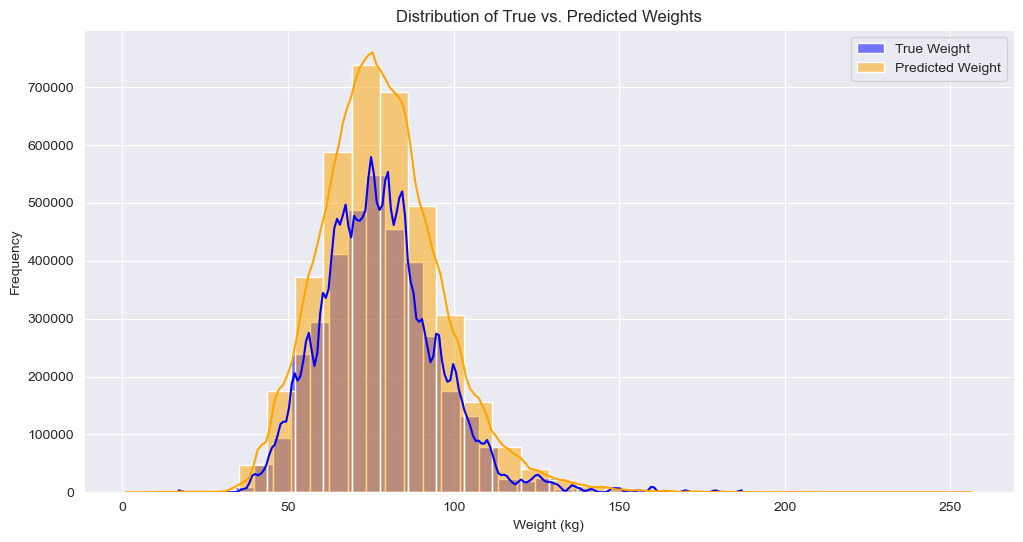

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(df['true_weight'], color='blue', kde=True, label='True Weight', bins=30)
sns.histplot(df['predicted_weight'], color='orange', kde=True, label='Predicted Weight', bins=30)
plt.legend()
plt.title("Distribution of True vs. Predicted Weights")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.show()

In [36]:
# Calculate absolute error
df['absolute_error'] = abs(df['true_weight'] - df['predicted_weight'])
df.head()

,model_name,true_weight,predicted_weight,set_type,additional_params,patient_id,pixel_array_file,absolute_error
2044655,vit_b_16_scale_multiplied_scaling_factor_sagit...,63.0,63.000008,Train,None,ANONYM-6LL37I_520,Scan_5038.npy,0.000008
1939139,vit_b_16_scale_multiplied_scaling_factor_sagit...,63.0,63.000008,Train,None,ANONYM-6LL37I_520,Scan_5038.npy,0.000008
3683084,vit_b_16_scale_multiplied_scaling_factor_sagit...,63.0,63.000008,Train,None,ANONYM-6LL37I_520,Scan_5038.npy,0.000008
1736900,vit_b_16_scale_multiplied_scaling_factor_sagit...,63.0,63.000008,Train,None,ANONYM-6LL37I_520,Scan_5038.npy,0.000008
2994299,vit_b_16_scale_multiplied_scaling_factor_sagit...,63.0,63.000008,Train,None,ANONYM-6LL37I_520,Scan_5038.npy,0.000008


In [39]:
# Group by model and calculate the mean absolute error
mae_by_model = df.groupby("model_name")["absolute_error"].mean().reset_index()

# Sort by ascending mean absolute error
mae_by_model = mae_by_model.sort_values("absolute_error")

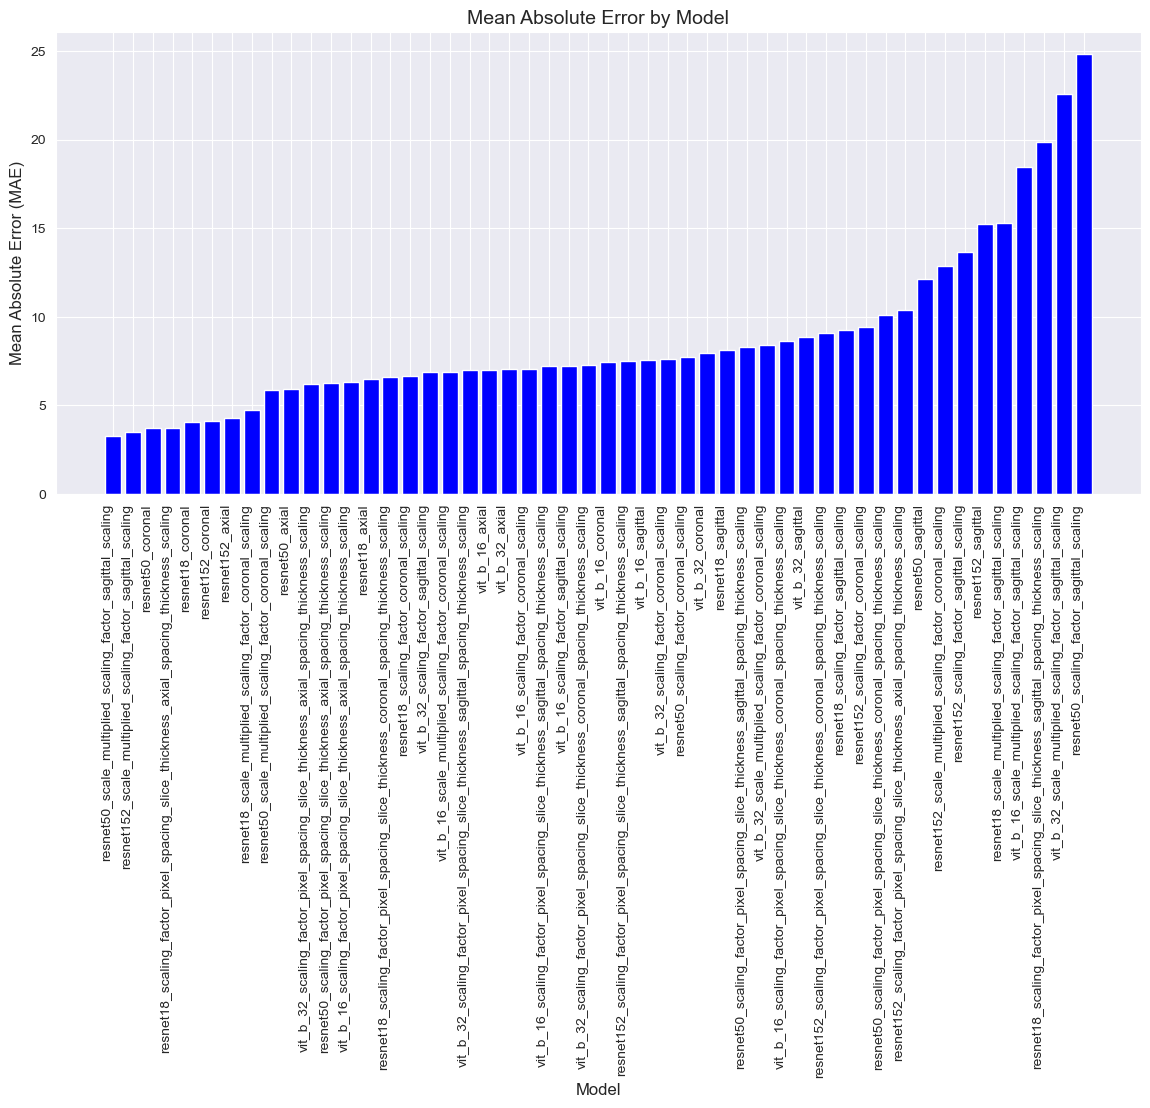

In [42]:
# Plot mean absolute error ascending per model 
# Plot the histogram
plt.figure(figsize=(14, 6))
plt.bar(mae_by_model["model_name"], mae_by_model["absolute_error"], color='blue')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=12)
plt.title("Mean Absolute Error by Model", fontsize=14)
plt.xticks(rotation=90, ha="right", fontsize=10)
plt.show()

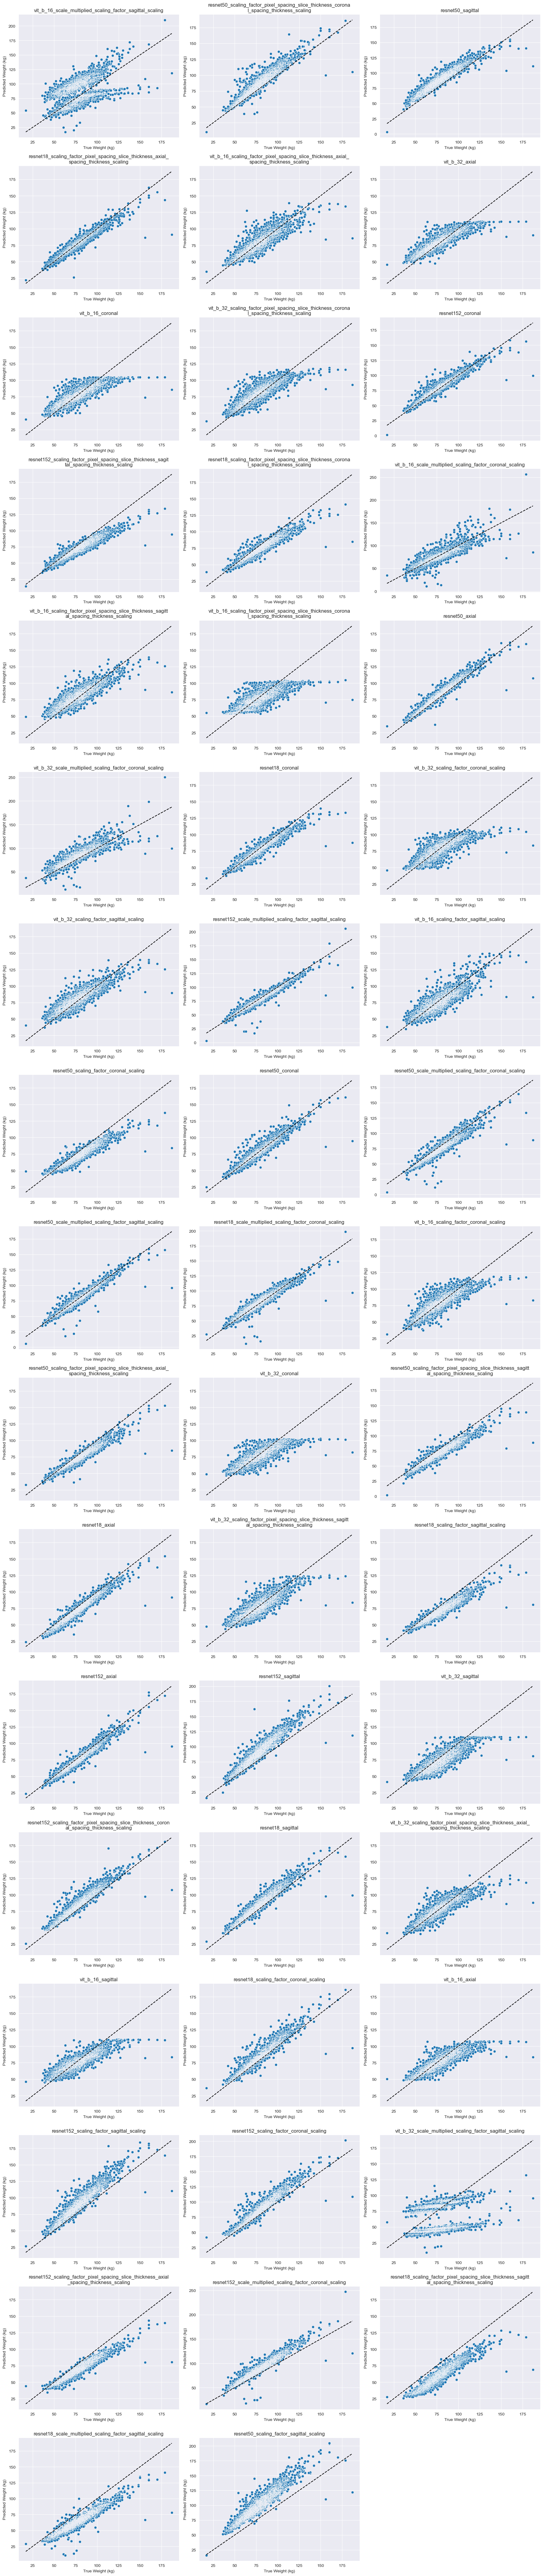

In [43]:
# Get unique model names
models = df['model_name'].unique()


# Adjust the number of rows based on the number of models
n_rows = (len(models) + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 5))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot True Weight vs Predicted Weight for each model
for i, model in enumerate(models):
    ax = axes[i]
    model_data = df[df['model_name'] == model]
    
    sns.scatterplot(
        x='true_weight', 
        y='predicted_weight', 
        data=model_data, 
        ax=ax
    )
    ax.plot(
        [model_data['true_weight'].min(), model_data['true_weight'].max()], 
        [model_data['true_weight'].min(), model_data['true_weight'].max()], 
        'k--'
    )
    
    #Wrapping long titles
    wrapped_title = "\n".join(textwrap.wrap(model, width=60))  # Adjust width as needed
    
    ax.set_title(wrapped_title)
    ax.set_xlabel("True Weight (kg)")
    ax.set_ylabel("Predicted Weight (kg)")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

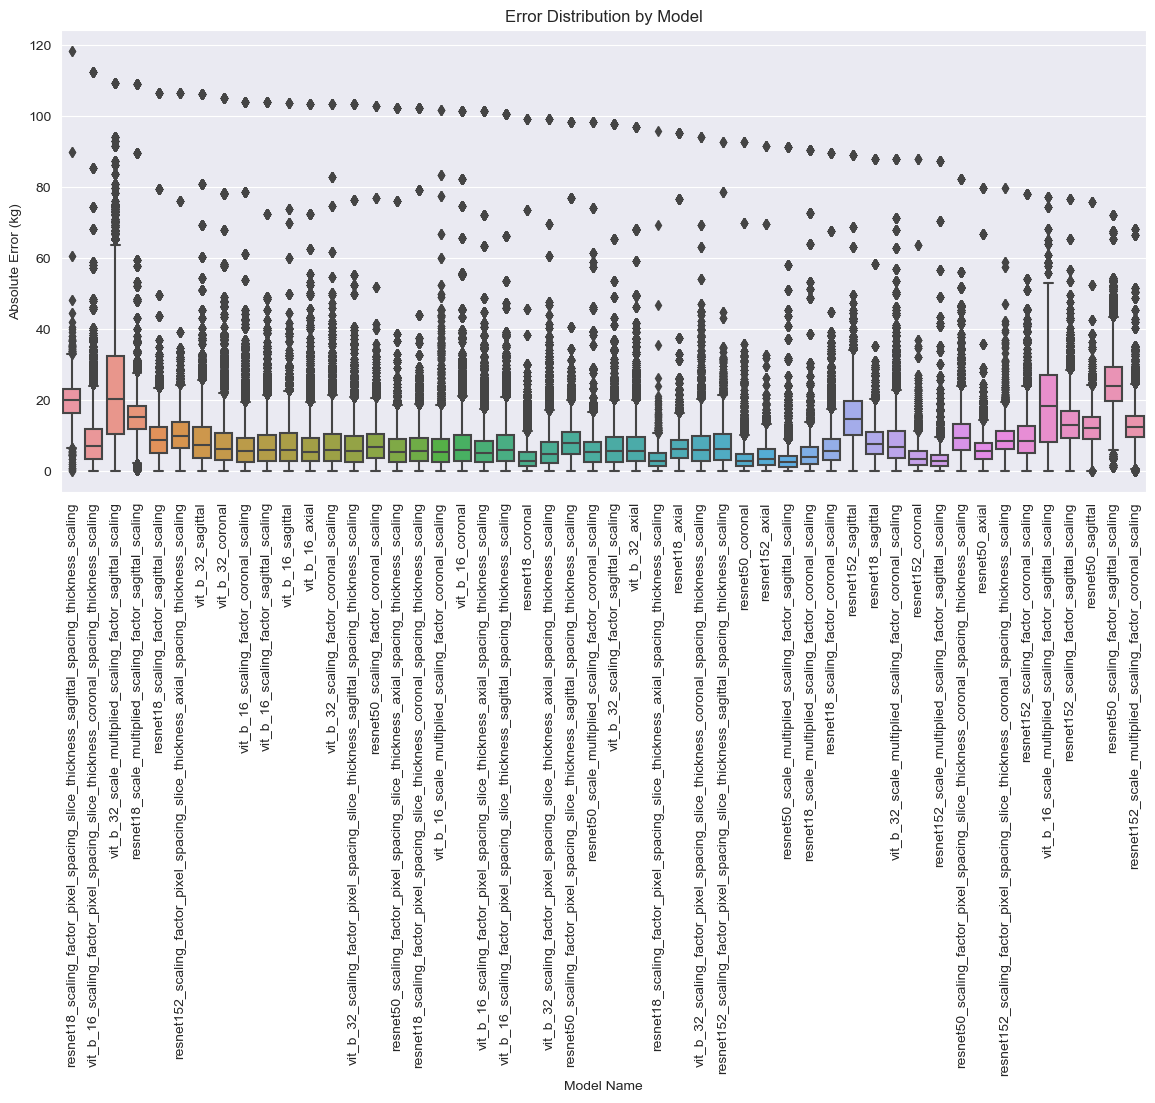

In [8]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='model_name', y='absolute_error', data=df)
plt.xticks(rotation=90)
plt.title("Error Distribution by Model")
plt.ylabel("Absolute Error (kg)")
plt.xlabel("Model Name")
plt.show()

In [44]:
# Sort by model_name and absolute_error to find best/worst predictions
best_performance = df.loc[df.groupby('model_name')['absolute_error'].idxmin()]
worst_performance = df.loc[df.groupby('model_name')['absolute_error'].idxmax()]

display(best_performance[['model_name', 'patient_id', 'pixel_array_file', 'true_weight', 'predicted_weight', 'absolute_error']].head())
display(worst_performance[['model_name', 'patient_id', 'pixel_array_file', 'true_weight', 'predicted_weight', 'absolute_error']].head())

,model_name,patient_id,pixel_array_file,true_weight,predicted_weight,absolute_error
3157747,resnet152_axial,ANONYM-6LL37I_457,Scan_4975.npy,51.0,51.005943,0.005943
3164622,resnet152_coronal,ANONYM-SMUXNZ_186,Scan_3801.npy,54.0,53.999226,0.000774
1834799,resnet152_sagittal,ANONYM-F0BEK6_19,Scan_1730.npy,57.0,57.006165,0.006165
1402797,resnet152_scale_multiplied_scaling_factor_coro...,ANONYM-W6HAEI_112,Scan_949.npy,78.0,77.927650,0.072350
3120407,resnet152_scale_multiplied_scaling_factor_sagi...,ANONYM-OCOPMB_38,Scan_421.npy,84.0,83.997986,0.002014


,model_name,patient_id,pixel_array_file,true_weight,predicted_weight,absolute_error
3714871,resnet152_axial,ANONYM-3X1ZSG_189,Scan_193.npy,187.0,95.441551,91.558449
3720733,resnet152_coronal,ANONYM-3X1ZSG_189,Scan_193.npy,187.0,99.177727,87.822273
2614097,resnet152_sagittal,ANONYM-3X1ZSG_52,Scan_54.npy,73.0,162.117813,89.117813
918767,resnet152_scale_multiplied_scaling_factor_coro...,ANONYM-CKABW1_13,Scan_3188.npy,179.0,247.074188,68.074188
3676768,resnet152_scale_multiplied_scaling_factor_sagi...,ANONYM-3X1ZSG_189,Scan_193.npy,187.0,99.726273,87.273727


In [10]:
# plot scan 193
scan_193 = df[df['pixel_array_file'] == 'Scan_193.npy']
scan_193 = np.load(f"../../Data/PixelArray/{scan_193['pixel_array_file'].iloc[0]}")

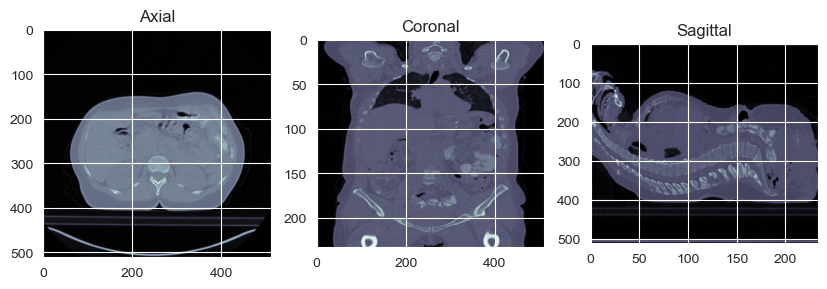

In [11]:
%matplotlib inline
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(scan_193[scan_193.shape[0] // 2, :, :], cmap='bone', aspect=1)
ax[0].set_title("Axial")
ax[1].imshow(scan_193[:, scan_193.shape[1] // 2, :], cmap='bone', aspect=2)
ax[1].set_title("Coronal")
ax[2].imshow(scan_193[:, :, scan_193.shape[2] // 2].T, cmap='bone', aspect=0.4)
ax[2].set_title("Sagittal")
plt.show()

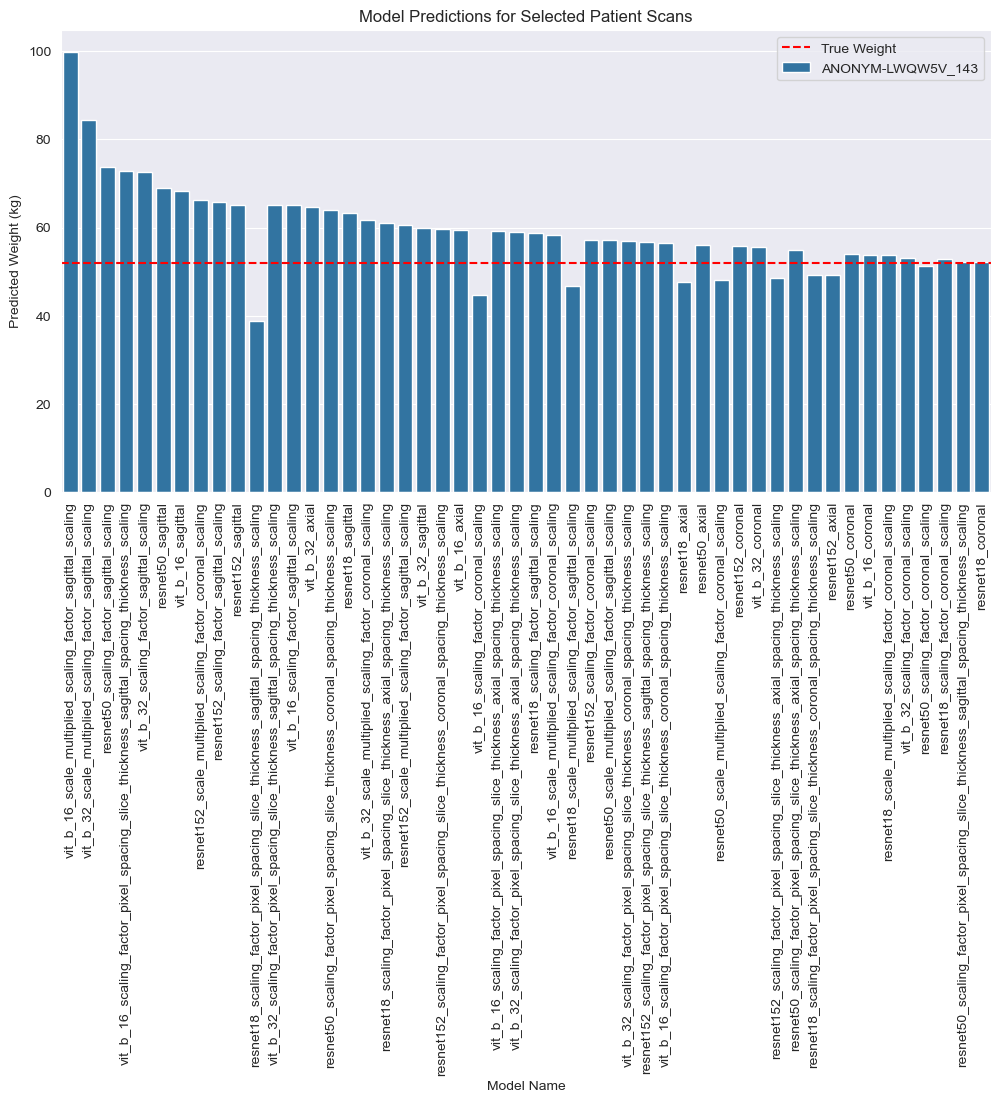

In [12]:
# Select specific scans
sample_scans = df[df['patient_id'].isin(['ANONYM-LWQW5V_143'])]

# Plot predictions for each model on selected scans
plt.figure(figsize=(12, 6))
sns.barplot(x='model_name', y='predicted_weight', hue='patient_id', data=sample_scans)
plt.axhline(y=sample_scans['true_weight'].iloc[0], color='red', linestyle='--', label='True Weight')
plt.legend()
plt.title("Model Predictions for Selected Patient Scans")
plt.ylabel("Predicted Weight (kg)")
plt.xlabel("Model Name")
plt.xticks(rotation=90)
plt.show()

## Model Statistics

In [46]:
statistics = pd.read_csv('model_statistics.csv')
statistics.head()

,model_name,dataset_name,query,with_scaling_factor,multiplied_scaling_factor,additional_params,train_loss mean_absolute_error,val_loss mean_absolute_error,max_absolute_error,epochs_trained,training_time (seconds),batch_size,learning_rate
0,resnet18,axial,"BodyPart == ""Stamm""",False,False,NaN,4.3094,6.8288,37.3711,10,16067.0,64,0.001
1,resnet50,axial,"BodyPart == ""Stamm""",False,False,NaN,4.5872,5.9688,35.8508,10,14791.0,64,0.001
2,vit_b_16,axial,"BodyPart == ""Stamm""",False,False,NaN,7.7868,6.8818,33.1640,10,15275.0,64,0.001
3,vit_b_32,axial,"BodyPart == ""Stamm""",False,False,NaN,6.8786,7.0116,33.0049,10,14293.0,64,0.001
4,resnet18,coronal,"BodyPart == ""Stamm""",False,False,NaN,4.9607,4.5564,27.9759,10,14608.0,64,0.001


In [45]:
# Compare multiplied scaling factor to additively scaled models
scaling_models = statistics[statistics['with_scaling_factor'] == True]
scaling_models.head()

,model_name,dataset_name,query,with_scaling_factor,multiplied_scaling_factor,additional_params,train_loss mean_absolute_error,val_loss mean_absolute_error,max_absolute_error,epochs_trained,training_time (seconds),batch_size,learning_rate
12,resnet18,coronal_scaling,"BodyPart == ""Stamm""",True,False,['scaling_factor'],5.460200,7.002000,44.717700,10,15352.000000,64,0.001
13,resnet50,coronal_scaling,"BodyPart == ""Stamm""",True,False,['scaling_factor'],5.823800,7.935000,32.268300,8,11925.000000,64,0.001
14,vit_b_16,coronal_scaling,"BodyPart == ""Stamm""",True,False,['scaling_factor'],7.583700,6.859100,42.610300,10,15826.000000,64,0.001
15,vit_b_32,coronal_scaling,"BodyPart == ""Stamm""",True,False,['scaling_factor'],8.459500,7.286800,42.126900,10,15725.000000,64,0.001
19,resnet152,coronal_scaling,"BodyPart == ""Stamm""",True,False,['scaling_factor'],5.211074,9.762896,50.836662,7,10124.077478,64,0.001


In [15]:
# mean absolute error comparison between multiplied and additively scaled models
mean_abs_err_non_multiplied = statistics[statistics['multiplied_scaling_factor'] == False]['val_loss mean_absolute_error'].mean()
mean_abs_err_multiplied = statistics[statistics['multiplied_scaling_factor'] == True]['val_loss mean_absolute_error'].mean()

print(f"Mean Absolute Error for Non-Multiplied Scaling Factor: {mean_abs_err_non_multiplied:.2f} kg")
print(f"Mean Absolute Error for Multiplied Scaling Factor: {mean_abs_err_multiplied:.2f} kg")

Mean Absolute Error for Non-Multiplied Scaling Factor: 8.48 kg
Mean Absolute Error for Multiplied Scaling Factor: 10.31 kg


In [16]:
# best mean absolute error by dataset
best_mean_abs_err = statistics.groupby('dataset_name')['val_loss mean_absolute_error'].min()
best_mean_abs_err

dataset_name
axial                                 4.677278
axial_spacing_thickness_scaling       4.078753
coronal                               4.556400
coronal_scaling                       4.942016
coronal_spacing_thickness_scaling     6.997183
sagittal                              7.526400
sagittal_scaling                      3.677151
sagittal_spacing_thickness_scaling    7.207489
Name: val_loss mean_absolute_error, dtype: float64

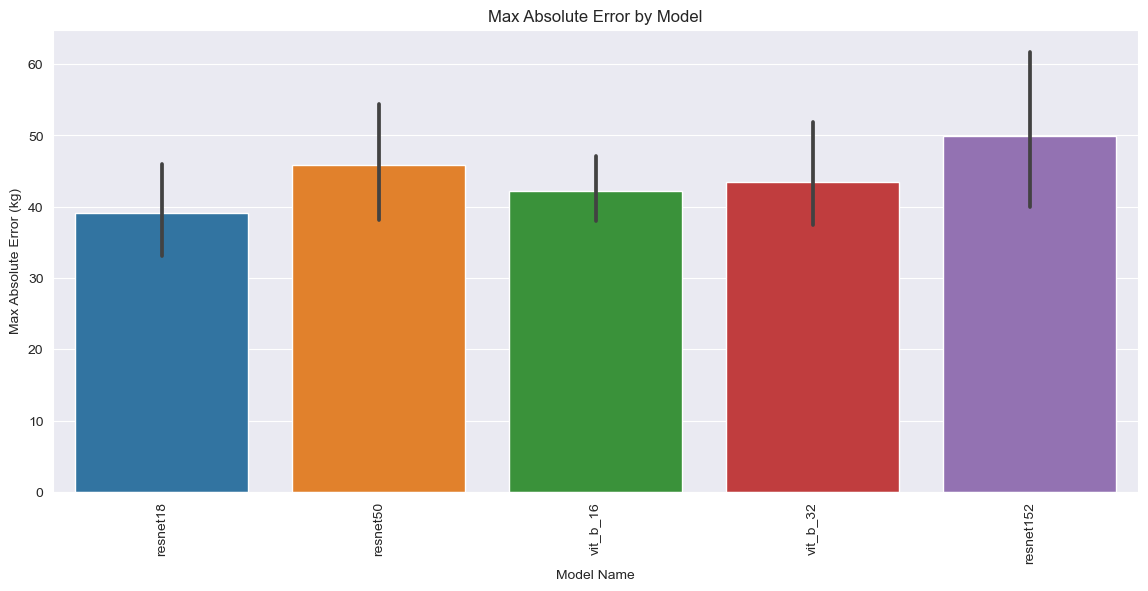

In [17]:
# plot max abs error by model_name
plt.figure(figsize=(14, 6))
sns.barplot(x='model_name', y='max_absolute_error', data=statistics)
plt.xticks(rotation=90)
plt.title("Max Absolute Error by Model")
plt.ylabel("Max Absolute Error (kg)")
plt.xlabel("Model Name")
plt.show()